In [1]:
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
from sklearn.linear_model import LinearRegression
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
sdata = pd.read_csv("data/StudentsPerformance.csv")


In [3]:
sdata["average score"] = (sdata["math score"] + sdata["reading score"] + sdata["writing score"])/3


In [4]:
sdata["average score"]

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: average score, Length: 1000, dtype: float64

In [5]:

sdata.loc[[0]]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667


In [6]:
from sklearn.preprocessing import OneHotEncoder

en = OneHotEncoder(handle_unknown="ignore")
en_temp = pd.DataFrame(en.fit_transform(sdata[["gender"]]).toarray())
en_temp.columns = en.get_feature_names_out(["gender"])
sdata.drop(["gender"],axis=1,inplace=True)
sdata = sdata.join(en_temp)


en_temp = pd.DataFrame(en.fit_transform(sdata[["race/ethnicity"]]).toarray())
en_temp.columns = en.get_feature_names_out(["race/ethnicity"])
sdata.drop(["race/ethnicity"],axis=1,inplace=True)
sdata = sdata.join(en_temp)



en_temp = pd.DataFrame(en.fit_transform(sdata[["test preparation course"]]).toarray())
en_temp.columns = en.get_feature_names_out(["test preparation course"])
sdata.drop(["test preparation course"],axis=1,inplace=True)
sdata = sdata.join(en_temp)

en_temp = pd.DataFrame(en.fit_transform(sdata[["lunch"]]).toarray())
en_temp.columns = en.get_feature_names_out(["lunch"])
sdata.drop(["lunch"],axis=1,inplace=True)
sdata = sdata.join(en_temp)







In [7]:
sdata["parental level of education"] = sdata["parental level of education"].replace('some high school',1)
sdata["parental level of education"] = sdata["parental level of education"].replace('high school',2)
sdata["parental level of education"] = sdata["parental level of education"].replace('some college',3)
sdata["parental level of education"] = sdata["parental level of education"].replace("associate's degree", 4)
sdata["parental level of education"] = sdata["parental level of education"].replace("bachelor's degree" ,5)
sdata["parental level of education"] = sdata["parental level of education"].replace("master's degree",6)








In [8]:
sdata.loc[[0]]
sdata.dtypes


parental level of education            int64
math score                             int64
reading score                          int64
writing score                          int64
average score                        float64
gender_female                        float64
gender_male                          float64
race/ethnicity_group A               float64
race/ethnicity_group B               float64
race/ethnicity_group C               float64
race/ethnicity_group D               float64
race/ethnicity_group E               float64
test preparation course_completed    float64
test preparation course_none         float64
lunch_free/reduced                   float64
lunch_standard                       float64
dtype: object

In [28]:
sdata["binnedaverage"] = pd.qcut(sdata["average score"],4,retbins=False,labels=[1,2,3,4])
# sdata["test preparation course"] = pd.qcut(sdata["test preparation course"],2,retbins=False,labels=[0,1])

#sdata["test preparation course_completed"].astype("category")
#sdata["test preparation course_none"].astype("category")
sdata["binned education"] = pd.cut(sdata["parental level of education"],4,retbins=False,labels=[1,2,3,4])









In [29]:
sdata.loc[[0]]


,parental level of education,math score,reading score,writing score,average score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,test preparation course_completed,test preparation course_none,lunch_free/reduced,lunch_standard,binnedaverage,binned education
0,4,72,72,74,72.666667,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3,4


In [30]:
from sklearn.datasets import fetch_openml 

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


X_train,X_test, y_train, y_test = train_test_split(sdata[["parental level of education"]], sdata["binnedaverage"], random_state=0)

model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

cvs = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy")
print(cvs)



y_train_pred = cross_val_predict(model, X_train, y_train, cv=3)



confuse = confusion_matrix(y_train,y_train_pred)

confusePlot = ConfusionMatrixDisplay(confuse)


print(confuse)

print(classification_report(y_train,y_train_pred))





[0.264 0.272 0.248]
[[40 17 77 56]
 [26 14 86 54]
 [47  7 74 59]
 [41 18 66 68]]
              precision    recall  f1-score   support

           1       0.26      0.21      0.23       190
           2       0.25      0.08      0.12       180
           3       0.24      0.40      0.30       187
           4       0.29      0.35      0.32       193

    accuracy                           0.26       750
   macro avg       0.26      0.26      0.24       750
weighted avg       0.26      0.26      0.24       750



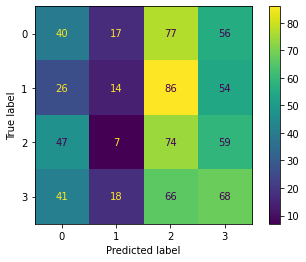

In [43]:

confusePlot.plot()

In [50]:
FP = confuse.sum(axis=0) - np.diag(confuse)  
FN = confuse.sum(axis=1) - np.diag(confuse)
TP = np.diag(confuse)
TN = confuse.sum() - (FP + FN + TP)

TPR = TP/(TP+FN)
FPR = FP/(FP+TN)

print(TPR,FPR)




[0.21052632 0.07777778 0.39572193 0.35233161] [0.20357143 0.07368421 0.40674956 0.30341113]


In [56]:
sklearn.metrics.roc_auc_score(y_, cvs)

ModuleNotFoundError: No module named 'yellowbrick'